In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
f_name = 'evaluation_csv/network_growth high_hater_follow_probs_and_normal_follows_normal-->num_haters-table.csv'

df_raw = pd.read_csv(f_name, skiprows=6)
df = df_raw[[
    '[run number]',
    '[step]',
    'p_normal_follows_normal',
    'hateful-node-percents',
    'plot-smoothed-mean-path-length true',
    'plot-smoothed-num-posts true',
    'swap-to-hate',
]]
df.loc[:, 'p_normal_follows_hater'] = df.apply(lambda row: 1 - row['p_normal_follows_normal'], axis=1)
df['polarisation-factor'] = False
df = df.sort_values(by=[
    '[run number]',
    '[step]',
    'p_normal_follows_hater',
])

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [3]:
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198400 entries, 9 to 198399
Data columns (total 9 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   [run number]                         198400 non-null  int64  
 1   [step]                               198400 non-null  int64  
 2   p_normal_follows_normal              198400 non-null  float64
 3   hateful-node-percents                198400 non-null  float64
 4   plot-smoothed-mean-path-length true  198400 non-null  float64
 5   plot-smoothed-num-posts true         198400 non-null  float64
 6   swap-to-hate                         198400 non-null  bool   
 7   p_normal_follows_hater               198400 non-null  float64
 8   polarisation-factor                  198400 non-null  bool   
dtypes: bool(2), float64(5), int64(2)
memory usage: 12.5 MB


In [4]:
# pd.options.display.max_rows = 100
df

,[run number],[step],p_normal_follows_normal,hateful-node-percents,plot-smoothed-mean-path-length true,plot-smoothed-num-posts true,swap-to-hate,p_normal_follows_hater,polarisation-factor
9,1,0,0.80,0.000000,0.000000,0.000000,False,0.20,False
91,1,1,0.80,0.000000,0.000000,0.000000,False,0.20,False
103,1,2,0.80,0.000000,0.000000,0.000000,False,0.20,False
111,1,3,0.80,0.000000,0.000000,0.000000,False,0.20,False
115,1,4,0.80,0.000000,0.000000,0.000000,False,0.20,False
...,...,...,...,...,...,...,...,...,...
198395,200,997,0.95,9.209209,1.194352,205.305197,False,0.05,False
198396,200,998,0.95,9.200000,1.192030,204.622707,False,0.05,False
198397,200,999,0.95,9.200000,1.192495,204.179494,False,0.05,False
198398,200,1000,0.95,9.200000,1.190213,204.504077,False,0.05,False


In [5]:
print('hateful-node-percents')
df_nodes = df[df['swap-to-hate'] == False].groupby(['p_normal_follows_hater'])['hateful-node-percents'].agg([
    np.min,
    np.mean,
    np.max,
    np.std
])
df_nodes

hateful-node-percents


,amin,mean,amax,std
p_normal_follows_hater,,,,
0.05,0.0,4.557752,25.0,3.680439
0.10,0.0,5.388790,25.0,3.834006
0.15,0.0,5.588750,25.0,3.951422
0.20,0.0,5.876358,25.0,3.988078


<AxesSubplot:xlabel='p_normal_follows_hater', ylabel='mean'>

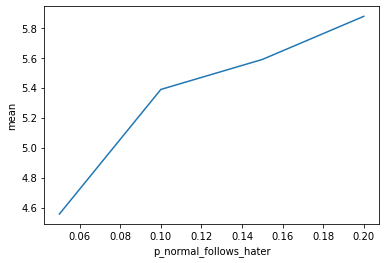

In [6]:
df_plot = df_nodes.reset_index()
sns.lineplot(data=df_plot, x="p_normal_follows_hater", y="mean")

In [7]:
print('mean-path-length hateful')
df_path = df[df['swap-to-hate'] == False].groupby(['p_normal_follows_hater'])['plot-smoothed-mean-path-length true'].agg([
    np.min,
    np.mean,
    np.max,
    np.std
])
df_path

mean-path-length hateful


,amin,mean,amax,std
p_normal_follows_hater,,,,
0.05,0.0,0.656399,1.417705,0.427453
0.10,0.0,0.783236,1.616807,0.466206
0.15,0.0,0.845324,1.783404,0.538991
0.20,0.0,0.958868,2.041214,0.581219


<AxesSubplot:xlabel='p_normal_follows_hater', ylabel='mean'>

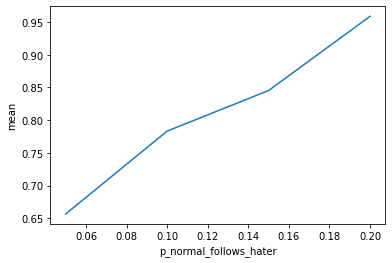

In [8]:
df_plot = df_path.reset_index()
sns.lineplot(data=df_plot, x="p_normal_follows_hater", y="mean")

In [9]:
print('num-posts hateful')
df_posts = df[df['swap-to-hate'] == False].groupby(['p_normal_follows_hater'])['plot-smoothed-num-posts true'].agg([
    np.min,
    np.mean,
    np.max,
    np.std
])
df_posts

num-posts hateful


,amin,mean,amax,std
p_normal_follows_hater,,,,
0.05,0.0,58.927745,291.155108,64.179464
0.10,0.0,80.847983,436.531297,83.601487
0.15,0.0,93.598715,398.501986,92.962725
0.20,0.0,118.056747,497.155613,113.862045


<AxesSubplot:xlabel='p_normal_follows_hater', ylabel='mean'>

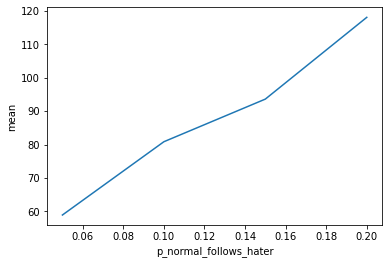

In [10]:
df_plot = df_posts.reset_index()
sns.lineplot(data=df_plot, x="p_normal_follows_hater", y="mean")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=76a22323-d43c-4823-9752-036f6744cf38' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>